<a href="https://colab.research.google.com/github/tuffisal/datascience/blob/main/Analisando_os_Dados_do_Airbnb_(SanDiego).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade San Diego/USA, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-states/ca/san-diego/2021-10-23/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5570,Ocean front condo on the sand,8435,Jef Karchin,NaN,Mission Bay,32.78481,-117.25313,Entire home/apt,2050,3,0,NaN,NaN,3,214,0,NaN
1,29967,"Great home, 10 min walk to Beach",129123,Michael,NaN,Pacific Beach,32.80724,-117.25630,Entire home/apt,225,4,71,2021-08-09,0.52,5,220,10,NaN
2,38245,Point Loma: Den downstairs,164137,Melinda,NaN,Roseville,32.74202,-117.21870,Private room,74,1,146,2021-08-15,1.44,3,346,3,NaN
3,39516,Art Studio Retreat/Rustic Cabin,169649,Chris And Jean,NaN,North Hills,32.73188,-117.11918,Entire home/apt,74,3,400,2020-03-16,3.35,1,149,0,NaN
4,54001,"La Jolla Cottage Blocks to Ocn; 2Bdms, 1Bth.",252692,Marsha,NaN,La Jolla,32.81301,-117.26856,Entire home/apt,258,4,275,2021-10-15,5.43,2,16,41,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame

# verificar as 5 primeiras entradas do dataset
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))


Entradas:	 9888
Variáveis:	 18



In [ ]:
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            4
neighbourhood_group               9888
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1330
reviews_per_month                 1330
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           9888
dtype: int64

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.134506
last_review                       0.134506
host_name                         0.000405
longitude                         0.000000
name                              0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

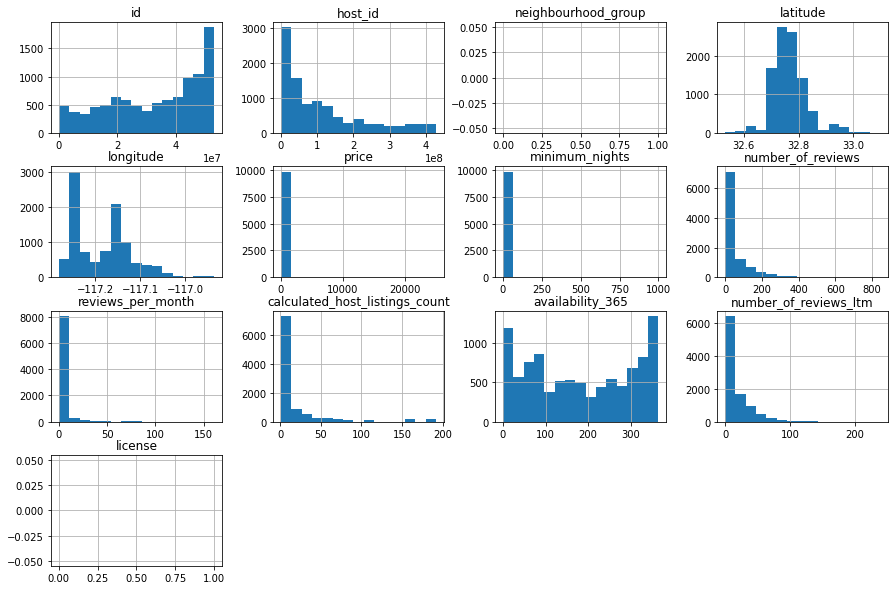

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,9888.000000,9888.000000,9888.000000,8558.000000,9888.000000,9888.000000
mean,267.728155,6.898867,53.479066,3.733736,17.535396,183.835558
std,642.474887,25.011588,83.349828,7.438428,36.495206,122.865270
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,106.000000,1.000000,3.000000,0.630000,1.000000,71.000000
50%,165.000000,2.000000,18.000000,1.910000,3.000000,176.000000
75%,295.000000,3.000000,67.000000,4.160000,15.000000,306.000000
max,24999.000000,999.000000,845.000000,161.000000,192.000000,365.000000


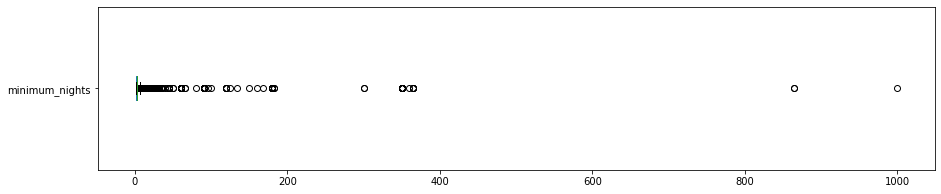

minimum_nights: valores acima de 30:
246 entradas
2.4879%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
df.price.mean()

267.7281553398058

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação

# mostrar a matriz de correlação
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.010051,-0.089709,-0.050533,0.160272,0.016999
minimum_nights,-0.010051,1.000000,-0.095750,-0.070083,-0.022155,0.043465
number_of_reviews,-0.089709,-0.095750,1.000000,0.216297,-0.158623,-0.087813
reviews_per_month,-0.050533,-0.070083,0.216297,1.000000,-0.066190,-0.034859
calculated_host_listings_count,0.160272,-0.022155,-0.158623,-0.066190,1.000000,0.225998
availability_365,0.016999,0.043465,-0.087813,-0.034859,0.225998,1.000000


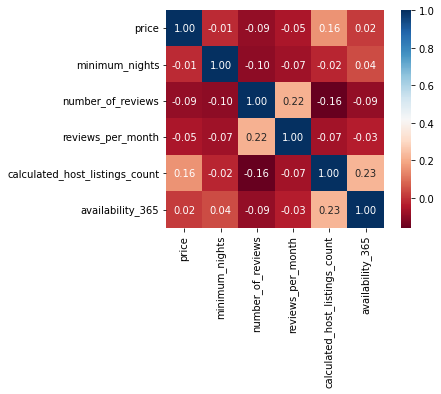

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df['room_type'].value_counts()

Entire home/apt    8019
Private room       1784
Shared room          74
Hotel room           11
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df['room_type'].value_counts() / df.shape[0]

Entire home/apt    0.810983
Private room       0.180421
Shared room        0.007484
Hotel room         0.001112
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
La Jolla            699.839884
Torrey Pines        466.105263
Wooded Area         453.512821
Mission Bay         392.675450
Carmel Valley       386.946903
Horton Plaza        353.777778
North City          341.406250
Del Mar Heights     331.021277
Midtown District    309.682927
Eastlake Woods      300.000000
Name: price, dtype: float64

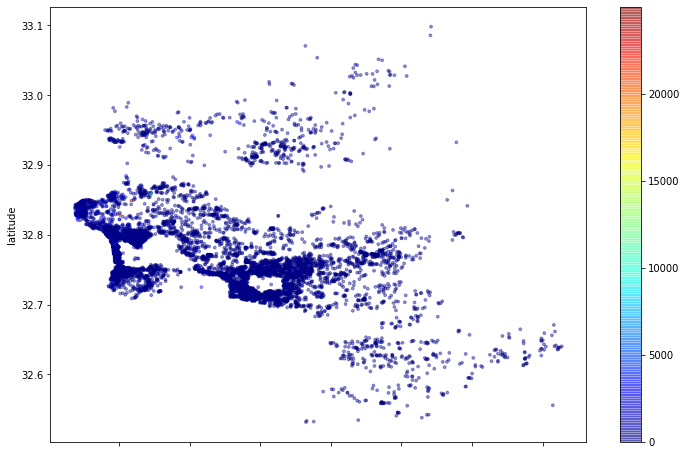

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

6.898867313915858

## Conclusões
